127.0


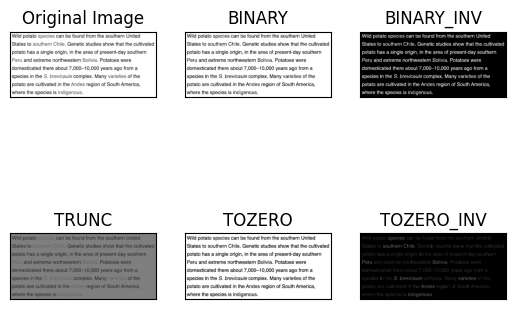

In [19]:
import cv2 as cv
from matplotlib import pyplot as plt
import os

img = cv.imread("/Users/hubertxu/Documents/notely/notely-ml/data/paragraph_potato.png", cv.IMREAD_GRAYSCALE)

ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)


titles = ["Original Image", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], "gray", vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# getStructuringElement  x  morphologyEx


Found 3 distinct contours representing lines.


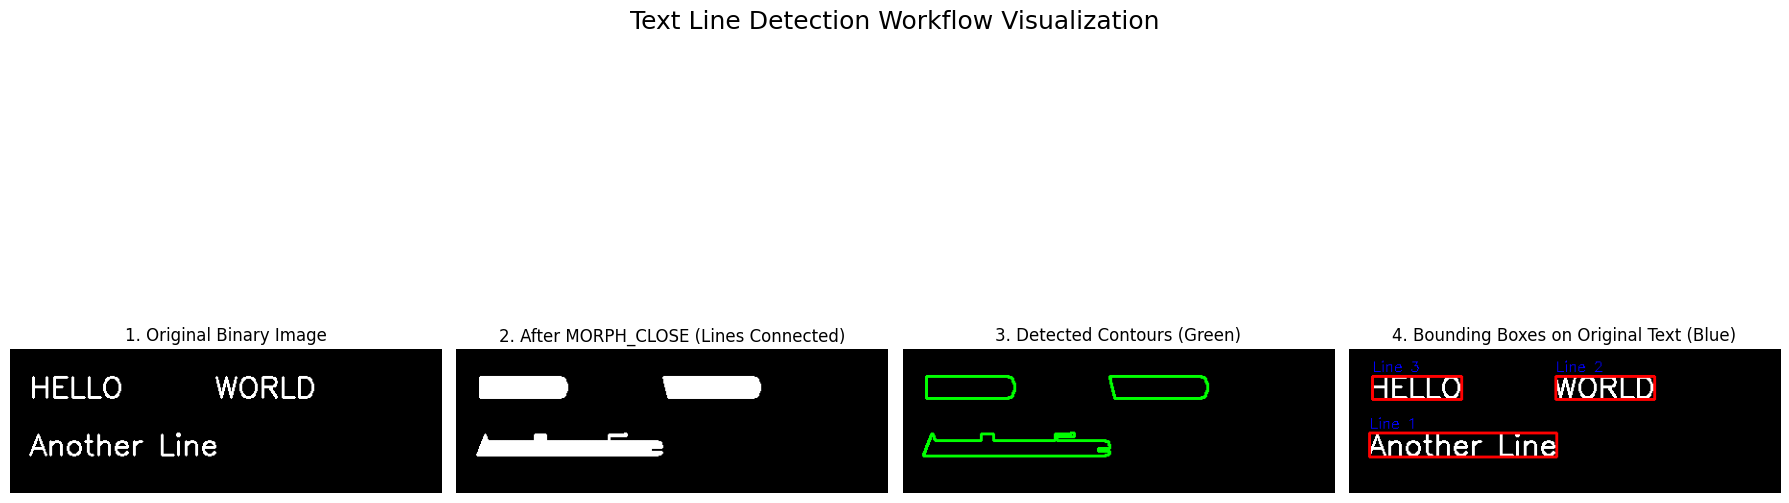

Shape of the horizontal kernel: (1, 40)

Displaying extracted line images (close each to proceed):


: 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a sample binary image to work with
# This simulates an image after thresholding, where text is white (255)
# and the background is black (0).
height, width = 150, 450
binary = np.zeros((height, width), dtype=np.uint8)

# Add some text with space between words to demonstrate the connection
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(binary, 'HELLO      WORLD', (20, 50), font, 1, (255, 255, 255), 2)
cv2.putText(binary, 'Another Line', (20, 110), font, 1, (255, 255, 255), 2)

# --- YOUR ORIGINAL CODE ---
# create horizontal kernel to connect text on the same line
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, horizontal_kernel)
# --------------------------

# --- NEW ADDITIONS FOR CONTOUR DETECTION AND VISUALIZATION ---

# 3. Find contours of the connected horizontal lines
# Use RETR_EXTERNAL to get only the outer boundaries of the connected lines
# Use CHAIN_APPROX_SIMPLE to store only the essential points of the contours (endpoints of lines)
contours, hierarchy = cv2.findContours(
    horizontal_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# 4. Create an image to draw the detected contours on
# Make it a 3-channel (color) image so we can draw contours in a distinct color (e.g., green)
# The dimensions should match the original binary image
contours_drawn_image = np.zeros((height, width, 3), dtype=np.uint8)
# Convert the binary image to BGR so we can overlay contours
binary_bgr = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Draw all found contours on the `contours_drawn_image`
# -1 means draw all contours in the list
# (0, 255, 0) is green color, 2 is thickness
cv2.drawContours(contours_drawn_image, contours, -1, (0, 255, 0), 2)

# Create an image to draw bounding boxes on the original text
bounding_boxes_image = binary_bgr.copy()
line_count = 0
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour) # Get bounding box coordinates

    # You can add filtering here if needed, for example:
    # if w > 50 and h > 10: # Example filtering based on size
    cv2.rectangle(bounding_boxes_image, (x, y), (x + w, y + h), (255, 0, 0), 2) # Draw blue rectangle
    cv2.putText(bounding_boxes_image, f'Line {line_count+1}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    line_count += 1

print(f"\nFound {len(contours)} distinct contours representing lines.")

# 5. Visualize all steps
plt.figure(figsize=(18, 8)) # Adjusted for more subplots

# Display the original binary image
plt.subplot(1, 4, 1)
plt.imshow(binary, cmap='gray')
plt.title('1. Original Binary Image')
plt.axis('off')

# Display the image after the horizontal closing operation
plt.subplot(1, 4, 2)
plt.imshow(horizontal_lines, cmap='gray')
plt.title('2. After MORPH_CLOSE (Lines Connected)')
plt.axis('off')

# Display the contours found on the connected lines
plt.subplot(1, 4, 3)
plt.imshow(contours_drawn_image) # Already BGR, so matplotlib will display correctly
plt.title('3. Detected Contours (Green)')
plt.axis('off')

# Display bounding boxes on the original text
plt.subplot(1, 4, 4)
plt.imshow(bounding_boxes_image) # Already BGR
plt.title('4. Bounding Boxes on Original Text (Blue)')
plt.axis('off')

plt.suptitle('Text Line Detection Workflow Visualization', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

# Optional: You can also print the kernel to see its shape
print("Shape of the horizontal kernel:", horizontal_kernel.shape)

# Optional: To see extracted lines (similar to previous explanation)
# This part is interactive and will pop up separate windows
print("\nDisplaying extracted line images (close each to proceed):")
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    # Applying the same filtering logic as the original snippet
    if w > 50 and h > 10:
        padding = 5
        y_start = max(0, y - padding)
        y_end = min(binary.shape[0], y + h + padding)
        
        # Extract the line from the original binary image for clarity
        extracted_line = binary[y_start:y_end, :] 
        cv2.imshow(f'Extracted Line {i+1} (Y_start: {y_start})', extracted_line)
        cv2.waitKey(0) # Wait for user to close window

cv2.destroyAllWindows() # Close all OpenCV windows at the end

In [ ]:
import cv2
import numpy as np

def visualize_text_line_detection(image_path):
    """
    Visualizes the steps involved in detecting horizontal text lines.

    Args:
        image_path (str): Path to the input image.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Create a copy for drawing
    visualization_image = image.copy()
    
    # Display the original image
    cv2.imshow('1. Original Image', image)
    cv2.waitKey(0)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow('2. Grayscale Image', gray)
    cv2.waitKey(0)

    # Apply adaptive thresholding to get a binary image
    # This is crucial for findContours and morphological operations
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
    )
    # Note: THRESH_BINARY_INV means text (foreground) will be white, background black.
    # This is often preferred for contour detection.
    cv2.imshow('3. Binary Image (Text as White)', binary)
    cv2.waitKey(0)

    # --- Step 1: Create a horizontal structuring element ---
    # This kernel is wide and short, designed to connect horizontal gaps.
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    print(f"Horizontal Kernel shape: {horizontal_kernel.shape}")
    print("Horizontal Kernel (visual representation - white is 1, black is 0):")
    kernel_vis = (horizontal_kernel * 255).astype(np.uint8)
    cv2.imshow('4. Horizontal Structuring Element (40x1)', kernel_vis)
    cv2.waitKey(0)

    # --- Step 2: Apply morphological closing ---
    # `cv2.MORPH_CLOSE` performs dilation followed by erosion.
    # Dilation: Expands white regions, connecting broken text fragments horizontally.
    # Erosion: Shrinks white regions, but since it's after dilation, it mostly
    #          removes small noise without breaking the now connected lines.
    # The `horizontal_kernel` ensures this operation primarily acts horizontally.
    horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, horizontal_kernel)
    cv2.imshow('5. After Morphological Closing (Horizontal Lines Connected)', horizontal_lines)
    cv2.waitKey(0)

    # --- Step 3: Find contours of text lines ---
    # `cv2.RETR_EXTERNAL`: Retrieves only the outermost contours.
    #                      Useful here because we want the overall line boundaries,
    #                      not individual character contours or holes.
    # `cv2.CHAIN_APPROX_SIMPLE`: Compresses horizontal and vertical segments, saving memory.
    #                            Just stores endpoints of lines.
    contours, _ = cv2.findContours(
        horizontal_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Create a blank canvas to draw the detected contours
    contours_on_blank = np.zeros_like(image)
    cv2.drawContours(contours_on_blank, contours, -1, (0, 255, 0), 2) # Draw all found contours in green
    cv2.imshow('6. All Contours Found (Before Filtering)', contours_on_blank)
    cv2.waitKey(0)

    # --- Step 4: Filter and extract line images ---
    lines = []
    line_count = 0
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour) # Get bounding box of the contour

        # Draw current contour's bounding box for visualization
        cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (0, 0, 255), 2) # Red bounding box
        cv2.putText(visualization_image, f'C{i}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        cv2.imshow('7. Current Contour Bounding Box', visualization_image)
        cv2.waitKey(500) # Short delay to see each box

        # Filter out noise based on width and height
        if w > 50 and h > 10:  # Adjust these thresholds based on your image content
            # Add padding for extraction
            padding = 5
            y_start = max(0, y - padding)
            y_end = min(image.shape[0], y + h + padding)
            
            # Extract the line image from the original (color) image
            # We take the full width of the image for the line segment
            line_image = image[y_start:y_end, :] 
            lines.append((line_image, y_start, y_end - y_start))
            
            # Draw the *filtered* line's bounding box on the original visualization
            cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (255, 0, 0), 2) # Blue for filtered
            cv2.putText(visualization_image, f'LINE {line_count}', (x, y + h + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)
            line_count += 1
            
            # Display the extracted line image
            cv2.imshow(f'Extracted Line {line_count}', line_image)
            cv2.waitKey(0) # Wait until user closes this line image

    cv2.imshow('8. Final Lines Detected (Blue Bounding Boxes on Original)', visualization_image)
    cv2.waitKey(0)

    print(f"\nDetected {len(lines)} text lines.")
    # You can now process each `line_image` for OCR, etc.

    cv2.destroyAllWindows()

# --- Example Usage ---
# Create a dummy image with some text-like structures if you don't have one
dummy_image_path = '/Users/hubertxu/Documents/notely/notely-ml/data/paragraph_potato.png'
dummy_img = np.zeros((300, 500, 3), dtype=np.uint8)
cv2.putText(dummy_img, "This is the first line of text.", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
cv2.putText(dummy_img, "Another line follows here.", (30, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
cv2.putText(dummy_img, "A very long line for testing the width filter.", (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
cv2.putText(dummy_img, "Short.", (20, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
cv2.line(dummy_img, (10, 250), (490, 250), (255, 255, 255), 1) # A thin line
cv2.imwrite(dummy_image_path, dummy_img)

# Run the visualization
visualize_text_line_detection(dummy_image_path)

# You can also use your own image:
# visualize_text_line_detection('path/to/your/document_image.jpg')